# Projekt Fahrrad

#### Guppe B: Carsten Düsterhöft, Silke Hock, Carmel Peka Sikadie, Nicole Thomas, Sieghard Weinketz

## Importe

In [93]:
# Importe
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline  import make_union
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from datetime import timedelta

## Daten laden

In [94]:
# Load csv
# source: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
data = pd.read_csv("London_bike_sharing_dataset.csv", parse_dates=["timestamp"],index_col="timestamp")

## Datenverständnis

In [95]:
print("Anzahl NULL-Werte: ", data.isna().any(axis=1).sum(axis=0), "\n")  # Carmel
print("Statistik:", data.describe())  # Silke

Anzahl NULL-Werte:  0 

Statistik:                 cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend        season  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722752      0.022051      0.285403      1.492075  
std        2.341163      0.146854      0.451619      1.118911

In [96]:
print("Anzahl Zeilen und Spalten des Datensatzes: ", data.shape)

Anzahl Zeilen und Spalten des Datensatzes:  (17414, 9)


In [97]:
print("Die ersten 5 Zeilen des Datensatzes:")
data.head()

Die ersten 5 Zeilen des Datensatzes:


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [98]:
print("Datentypen der einzelnen Spalten:\n", data.dtypes)

Datentypen der einzelnen Spalten:
 cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [99]:
print("Im Datensatz enthaltene Wettercodes:")
data["weather_code"].unique()  # alle sieben Zahlen kommen in der Datenbeschreibung vor

Im Datensatz enthaltene Wettercodes:


array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [100]:
# Carmel
data['uhrzeit']=data.index.hour
data['monat']=data.index.month
data['tag'] = data.index.day_name()
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,uhrzeit,monat,tag
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,Sunday
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,Sunday
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,Sunday
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,Sunday
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,Sunday


In [101]:
print("Datentypen des Datensatzes und Angabe der Anzahl von Nicht-NULL-Werten:\n")
data.info()

Datentypen des Datensatzes und Angabe der Anzahl von Nicht-NULL-Werten:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   uhrzeit       17414 non-null  int32  
 10  monat         17414 non-null  int32  
 11  tag           17414 non-null  object 
dtypes: float64(8), int32(2), int64(1), object(1)
memory usage: 1.6+ MB


In [102]:
# Suche nach Duplikaten kompletter Zeilen
print("Duplikate kompletter Zeilen:")
data.loc[data.duplicated(),:]

Duplikate kompletter Zeilen:


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,uhrzeit,monat,tag
timestamp,,,,,,,,,,,,


In [103]:
# aus df_raw.describe: erster  timestamp = 2015-01-04 00:00:00
#                      letzter timestamp = 2017-01-03 23:00:00
datetime_format = "%Y-%m-%d %H:%M:%S"
a = datetime.strptime('2015-01-04 00:00:00', datetime_format)
b = datetime.strptime('2017-01-03 23:00:00', datetime_format)
delta = b - a
zeilen1 = len(data.index)
zeilen2 = data.shape[0]
print(f"Anzahl Zeilen: {zeilen1} bzw. {zeilen2}")
print(f"Anzahl Tage: {delta.days}, Anzahl Stunden: {delta.days*24} bzw. {delta.total_seconds()/3600.}")
print(f"\nAnzahl Stunden ({delta.total_seconds()/3600.}) - Anzahl Zeilen ({zeilen2}) = {delta.total_seconds()/3600. - zeilen2} fehlende Zeilen") 
# ==> Zeitraum enthält 129 Zeilen zu wenig

# zu Testzwecken:
# a1 = datetime.strptime('2015-01-04 00:00:00', datetime_format)
# b1 = datetime.strptime('2015-01-05 02:00:00', datetime_format)
# delta1 = b1 - a1
# print(f"Tage: {delta1.days}, Anzahl Stunden: {delta1.total_seconds()/3600}")

Anzahl Zeilen: 17414 bzw. 17414
Anzahl Tage: 730, Anzahl Stunden: 17520 bzw. 17543.0

Anzahl Stunden (17543.0) - Anzahl Zeilen (17414) = 129.0 fehlende Zeilen


## Suche nach Lücken kompletter Datenzeilen

## Plots

In [76]:
numerical_features1=['t1','t2','hum','wind_speed','cnt']
numerical_features=['t1','t2','hum','wind_speed']
categorical_fetures=['weather_code','is_holiday','is_weekend','season','uhrzeit','monat','tag']

<Axes: xlabel='timestamp'>

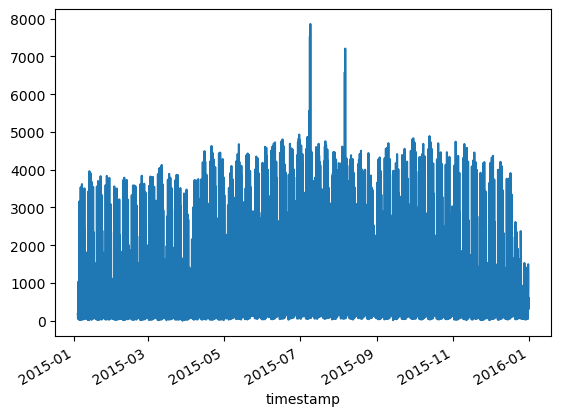

In [77]:
data.loc['2015','cnt'].plot()

## Anzahl der Ausleihen (cnt) für die Spalten t1, t2, hum, wind_speed, cnt

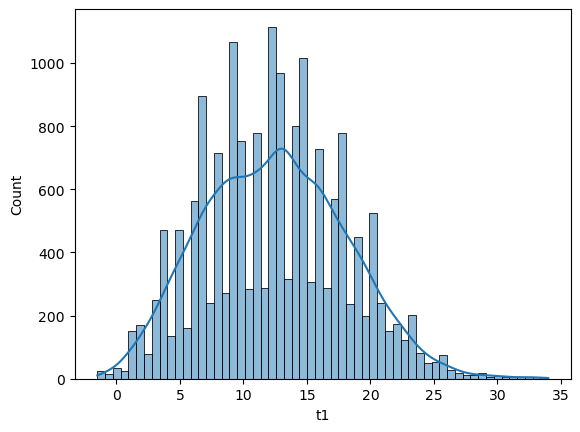

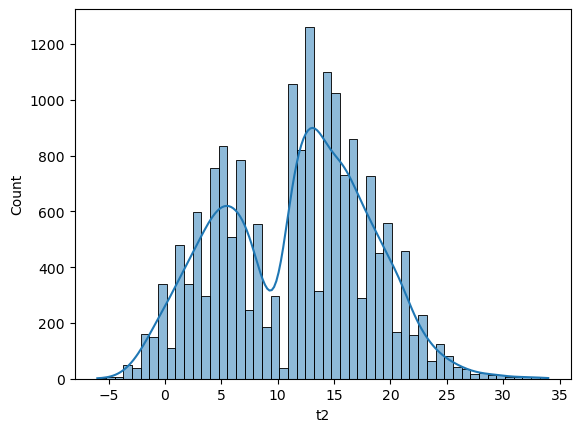

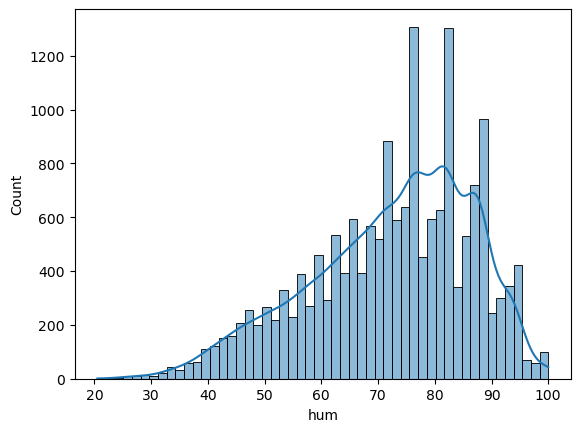

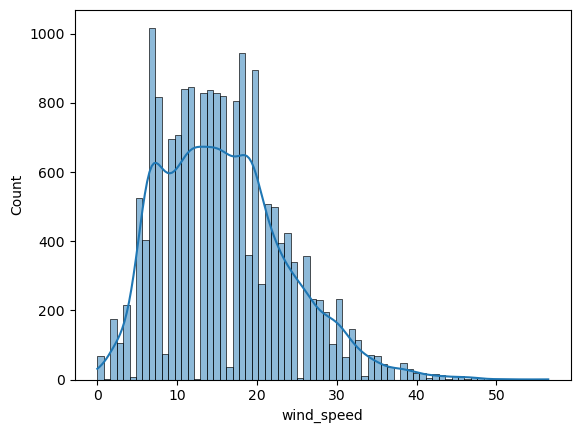

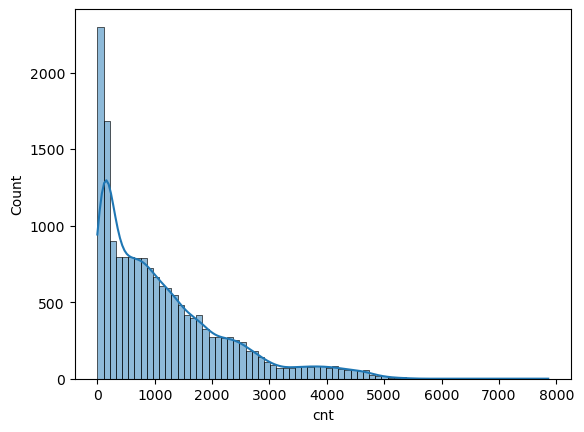

In [78]:
# Plots für numerical_features1 t1, t2, hum, wind_speed, cnt
for col in numerical_features1:
    plt.figure()
    sns.histplot(data[col], kde=True)

## Matrixplot der Abhängigkeiten von je zwei Spalten zueinander für die vier Spalten t1, t2, hum, wind_speed

C:\Users\pekas\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


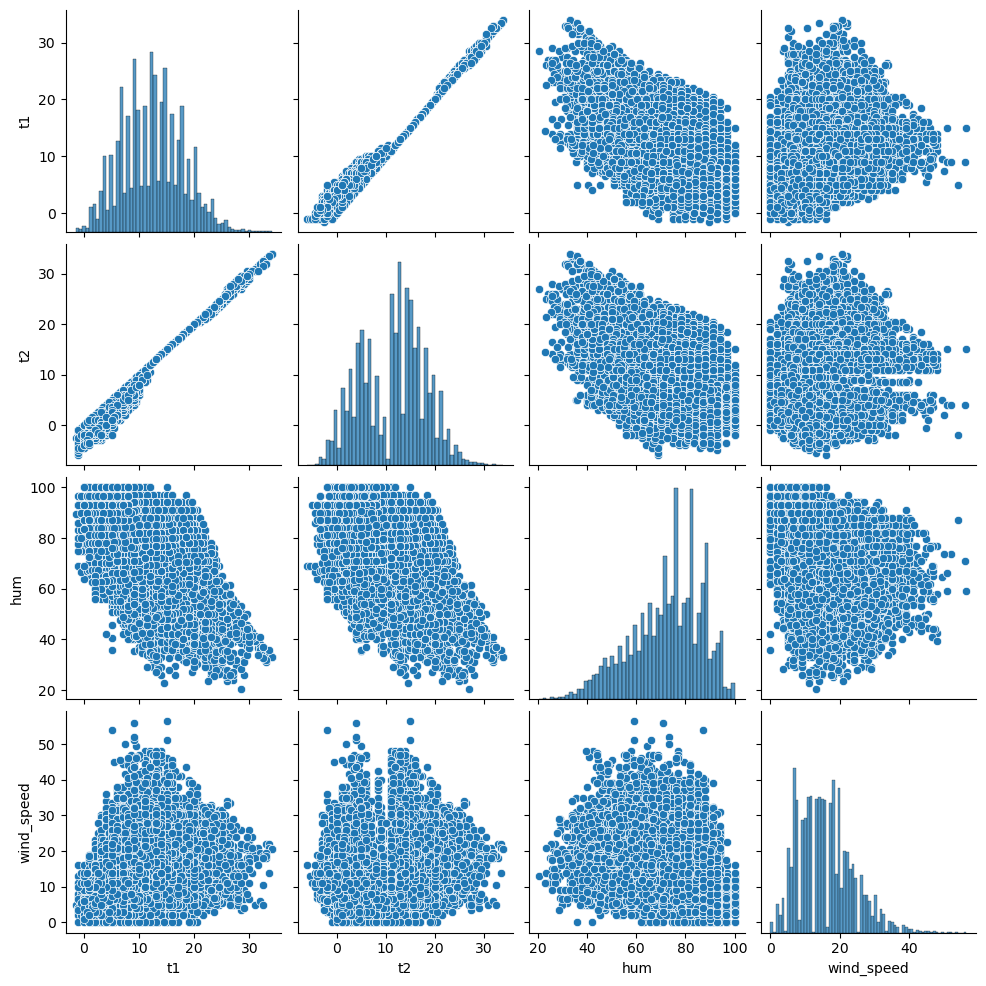

In [79]:
# Matrixplot zu den Abhängigkeiten von je zwei Spalten zueinander für die 4 Spalten t1, t2, hum, wind_speed
sns.pairplot(data[numerical_features])

## Korrelationsmatrix für t1, t2, hum und wind_speed

In [80]:
data[numerical_features].corr()

,t1,t2,hum,wind_speed
t1,1.000000,0.988344,-0.447781,0.145471
t2,0.988344,1.000000,-0.403495,0.088409
hum,-0.447781,-0.403495,1.000000,-0.287789
wind_speed,0.145471,0.088409,-0.287789,1.000000


weather_code
is_holiday
is_weekend
season
uhrzeit
monat
tag


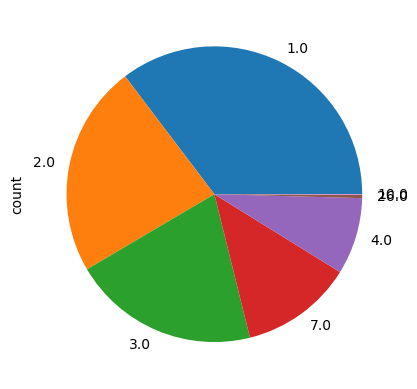

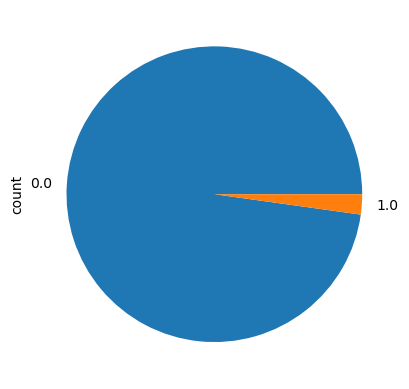

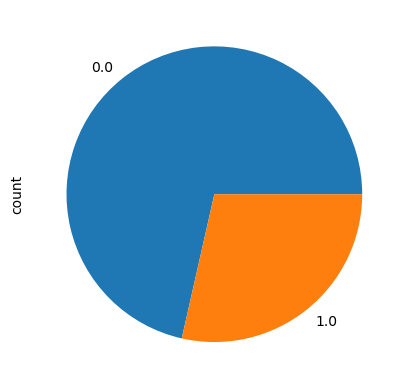

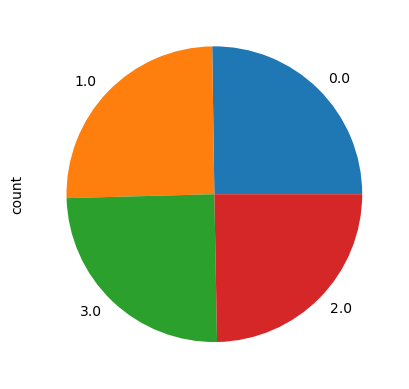

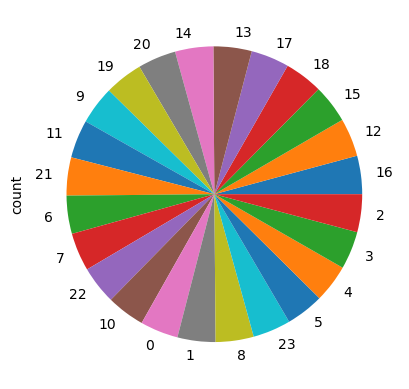

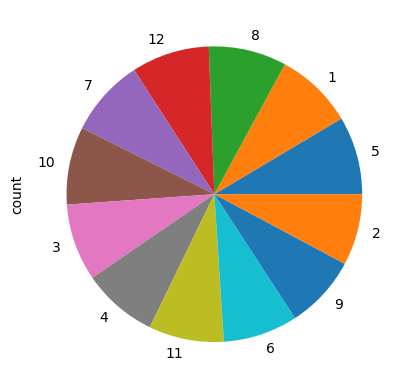

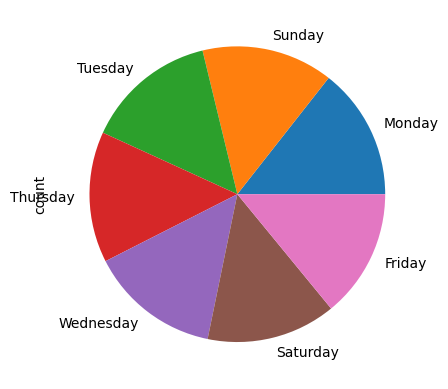

In [81]:
for col in categorical_fetures:
    plt.figure()
    print(col)
    data[col].value_counts().plot.pie()

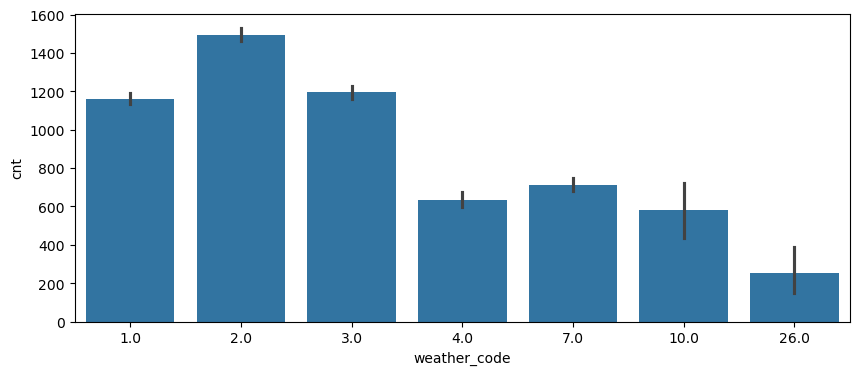

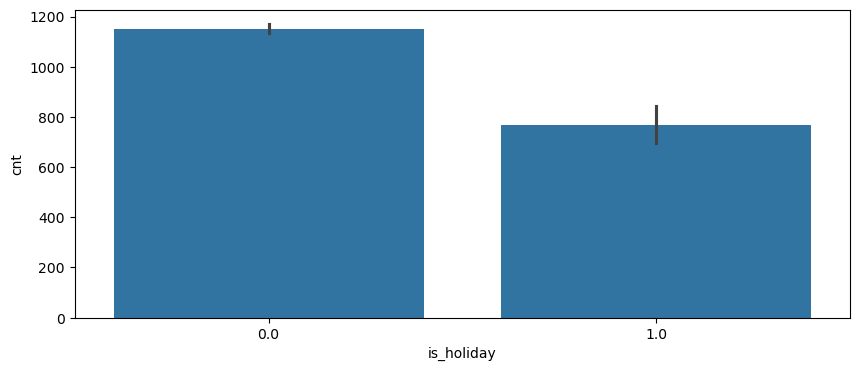

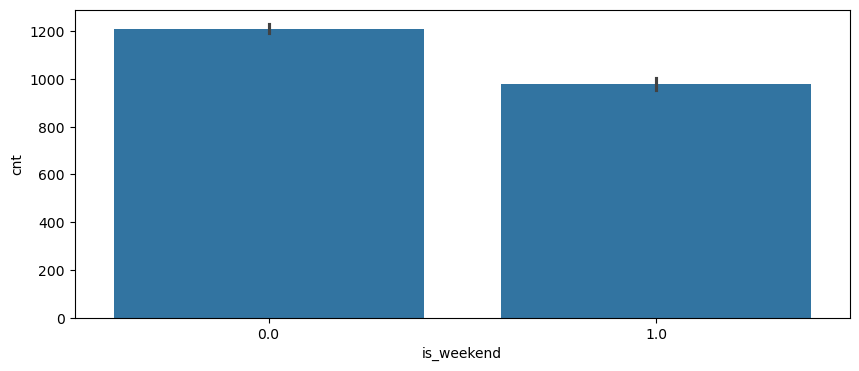

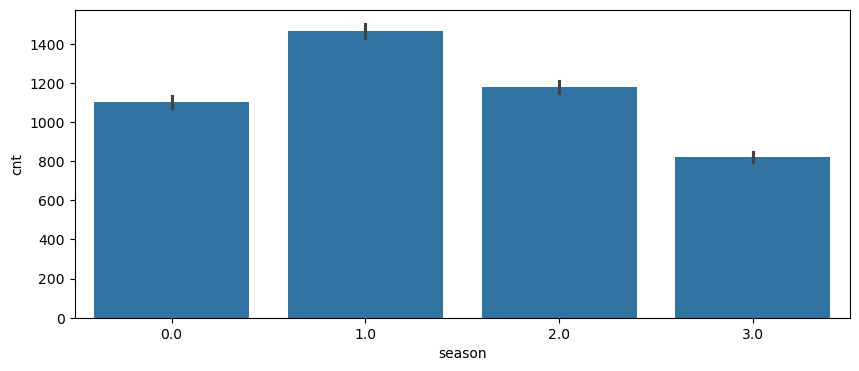

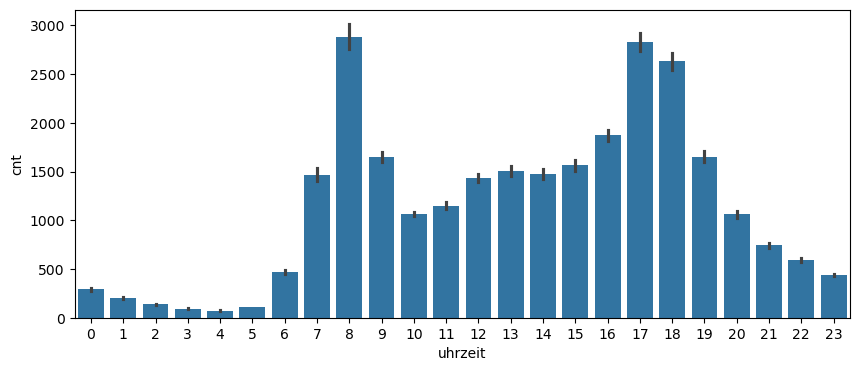

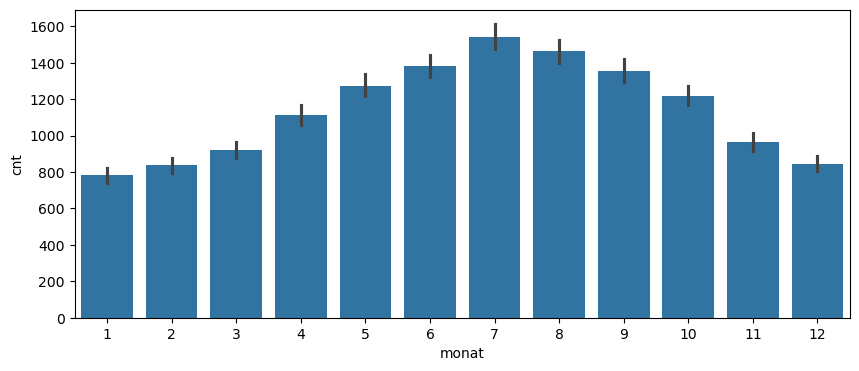

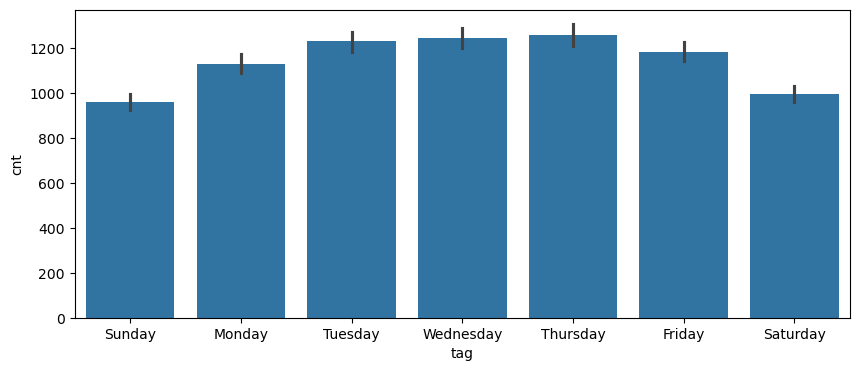

In [82]:
for col in categorical_fetures:
    plt.figure(figsize=(10,4))
    sns.barplot(x=col, y="cnt", data=data);

<Axes: xlabel='monat', ylabel='cnt'>

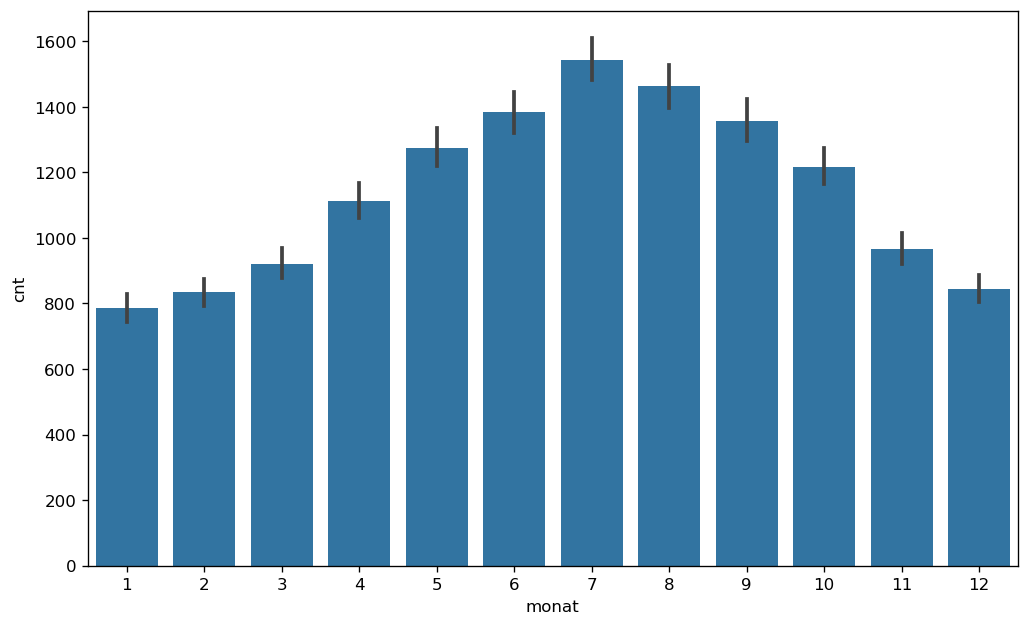

In [83]:
plt.figure(figsize=(10,6), dpi=120)
sns.barplot(x="monat", y="cnt", data=data)

[Text(0.5, 1.0, 'Ausleihungen an Wochentagen')]

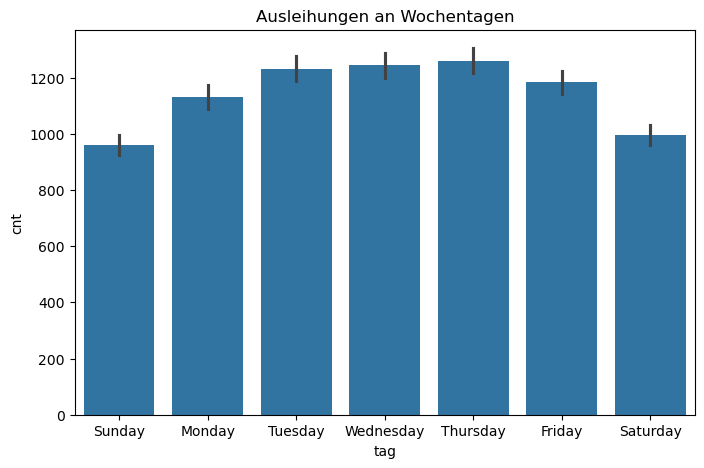

In [84]:
# Ergänzung von Silke
plt.figure(figsize=(8,5))
sns.barplot(x="tag", y="cnt", data=data).set(title='Ausleihungen an Wochentagen')

In [85]:
# # Plot Ausleihungen pro timestamp (Silke)
# plt.figure(figsize=(8, 4))
# plt.plot(data['timestamp'], data['cnt'])
# plt.title('Anzahl Ausleihungen pro Stunde von 2015 bis 2016', fontsize=14)
# plt.xlabel("Zeitstempel", fontsize=12)
# plt.ylabel("Anzahl", fontsize=12)
# plt.xticks(rotation=45)
# plt.show()